In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot: xlabel='petal_length', ylabel='sepal_width'>

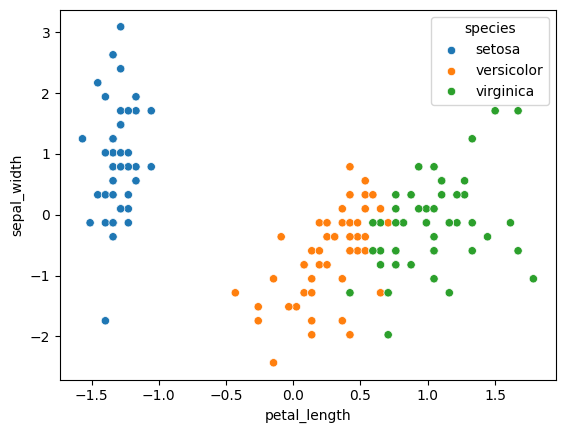

In [37]:

sns.scatterplot(x=iris["petal_length"],y=iris["sepal_width"],hue=iris["species"])


El diagrama de dispersion muestra que los datos estan separados por grupos, que coinciden con las especies. 

EL objetivo de este codigo, es ajustar un modelo de clasificacion basado en el algoritmo kmeans, para ajustar un modelo que permita clasificar el registro en alguna de las especies segun los valores suministrados para cada campo numerico.

Se observa que las variables están en escalas diferentes, esto puede ser un problema a la hora de ejecutar el algoritmo, esto debido a que las diferencias de escala pueden generar falsas clasificaciones. PAra solucionarlo, se realizará un proceso de estandarizacion a los datos, con el fin de eliminar este problema.

In [26]:
scaler=StandardScaler()
iris[["petal_length","petal_width","sepal_width","sepal_length"]]=scaler.fit_transform(iris[["petal_length","petal_width","sepal_width","sepal_length"]])

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


Luego de transformar los datos, se procede a evaluar que numero de cluster es ideal para los datos, esto se hace ejecutando el algoritmo variando el numero de cluster, y observando para que valor, la metrica de error es la mas optima

Para este ejercicio se utilizará como metrica de comparacion la inercia (suma de las distancias al cuadrado al centro del cluster mas cercano)

In [32]:
def optimize_k_means(data,max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # generate plot
    fig=plt.subplots(figsize=[10,5])
    plt.plot(means,inertias,"o-")
    plt.xlabel("Number of clusters") 
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.title("Inertia according the number of cluster")
    plt.show   

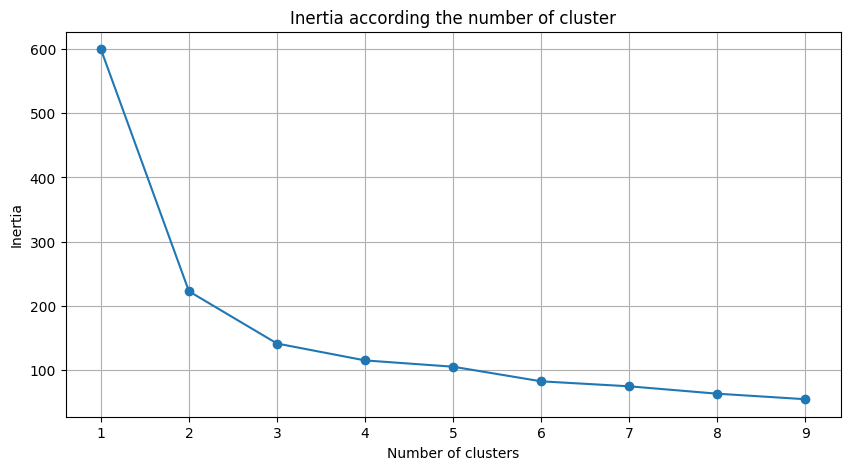

In [33]:
optimize_k_means(iris[["petal_length","petal_width","sepal_width","sepal_length"]], 10)

Segun el grafico anterior, se observa que a medida que se aumenta el numero de cluster, la inercia disminuye, pero para evitar un posible sobreajuste del modelo y considerando que los datos vienen agrupados segun tres especies distintas, se considerarán tres cluster, para luego poder comparar directamente como se comportó el algoritmo con un igual numero de grupos 

In [53]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(iris[["petal_length","petal_width","sepal_width","sepal_length"]])

KMeans(n_clusters=3)

In [54]:
iris["cluster"]=kmeans.labels_

In [59]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,1,0,0,1,1,1,1
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,1,0,0,1,1,1,1
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,1,0,0,1,1,1,1
3,-1.506521,0.098217,-1.283389,-1.315444,setosa,1,0,0,1,1,1,1
4,-1.021849,1.249201,-1.340227,-1.315444,setosa,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica,2,0,1,0,2,2,3
146,0.553333,-1.282963,0.705921,0.922303,virginica,0,0,1,2,3,0,0
147,0.795669,-0.131979,0.819596,1.053935,virginica,2,0,1,0,2,2,3
148,0.432165,0.788808,0.933271,1.448832,virginica,2,0,1,0,2,2,3


Ahora, se procederá a realizar el mismo grafico anterior, pero en lugar de pintar los puntos segun la especie, se pintarán segun el cluster asignado

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


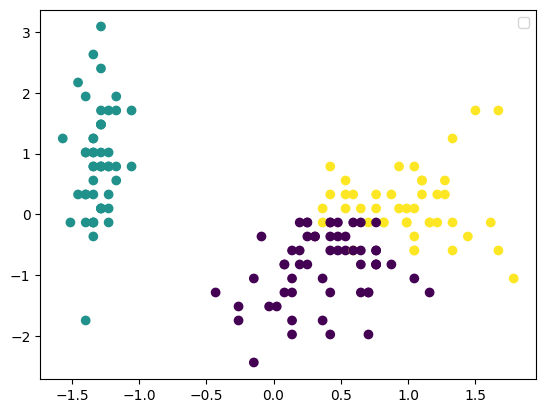

In [61]:
plt.scatter(x=iris["petal_length"],y=iris["sepal_width"],c=iris["cluster"])
plt.legend()

Ahora, para comparar la efectividad del modelo, se realizará lo que se conoce como matriz de confusion, en la que se tabularán los caso reales, contra los predichos del modelo, esto para desglosar el comportamiento del modelo, respecto a las clasificaciones hechas


In [57]:
print("KMeans results: \n",pd.crosstab(iris["species"],kmeans.labels_,rownames=["Observed"],colnames=["Predicted"]))

KMeans results: 
 Predicted    0   1   2
Observed              
setosa       0  50   0
versicolor  39   0  11
virginica   17   0  33


Se observa que el modelo es muy bueno clasificando el grupo setosa, ya que todos estos registros los agrupó en el cluster 1, mientras que versicolor estuvo en su mayoria en el cluster 0 y virginica en el cluster 2. Se observa tambien que el modelo no es perfecto, solo en el cluster 1 se clasifica perfectamente, mientras que en los cluster 0 y 2 hay algunas clasificaciones erradas, esto está de acuerdo con lo mostrado en el diagrada de dispersion, donde algunos datos estaban tan cercanos que no se distinguia a que grupo podrian asignarse de manera independiente 

Si se quisiera evaluar como se comportan los datos segun el numero de luster se puede realizar de la siguiente manera

In [45]:
for k in range(1,7):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(iris[["petal_length","petal_width","sepal_width","sepal_length"]])
    iris[f"KMeans_{k}"]=kmeans.labels_
iris

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,1,0,0,1,1,1,1
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,1,0,0,1,1,1,1
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,1,0,0,1,1,1,1
3,-1.506521,0.098217,-1.283389,-1.315444,setosa,1,0,0,1,1,1,1
4,-1.021849,1.249201,-1.340227,-1.315444,setosa,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica,2,0,1,0,2,2,3
146,0.553333,-1.282963,0.705921,0.922303,virginica,0,0,1,2,3,0,0
147,0.795669,-0.131979,0.819596,1.053935,virginica,2,0,1,0,2,2,3
148,0.432165,0.788808,0.933271,1.448832,virginica,2,0,1,0,2,2,3


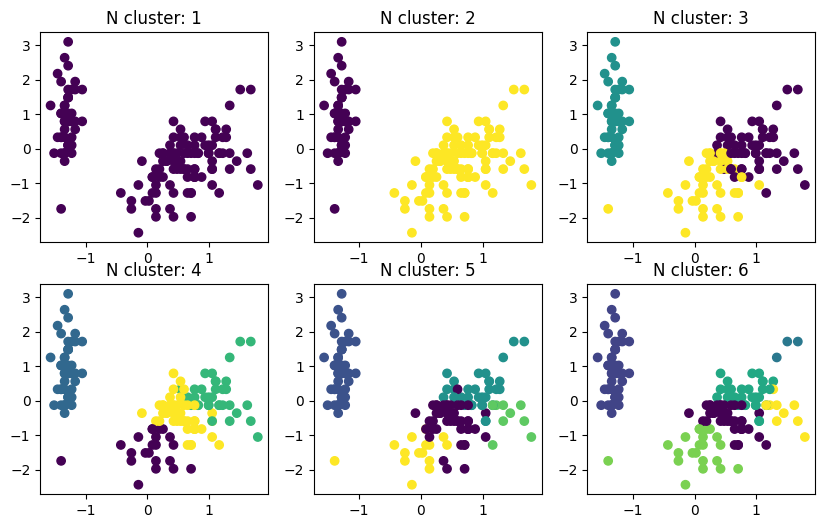

In [50]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(10,6))
for i,ax in enumerate(fig.axes,start=1):
    ax.scatter(x=iris["petal_length"],y=iris["sepal_width"],c=iris[f"KMeans_{i}"])
    ax.set_title(f"N cluster: {i}")


Se concluye que el algoritmo es muy bueno clasificando un grupo de flores (Setosa), mientras que los otros presentan complicaciones debido a la cercania de los datos.Es posible que con otra metodologia de clustering se pueda lograr un mejor resultado en la clasificacion